# Sentiment

Visualize sentiment analysis

In [3]:
import datetime
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
DATADIRECTORYALL = "../data/sentiment/"
DATADIRECTORYRIVM = "../data/rivm-sentiment/"
SENTIMENT = "sentiment"
COUNT = "count"
DATA = "data"
LABEL = "label"

## Read hourly sentiment analysis by pattern's sentiment analysis

In [74]:
def getSentimentPerHour(dataDirectory):
    fileList = os.listdir(dataDirectory)
    sentimentPerHour = {}
    for inFileName in fileList:
        if re.search(r"2*z",inFileName):
            try: df = pd.read_csv(dataDirectory+inFileName,compression="gzip",header=None)
            except: continue
            sentiment = sum(df[1])/len(df)
            hour = inFileName[0:11]
            sentimentPerHour[hour] = { SENTIMENT:sentiment, COUNT:len(df) }
    sentimentPerHour = {key:sentimentPerHour[key] for key in sorted(sentimentPerHour.keys())}
    return(sentimentPerHour)

## Convert hourly analysis to day scores

In [75]:
def makeSentimentPerDay(sentimentPerHour):
    sentimentPerDay = {}
    for hour in sentimentPerHour:
        day = re.sub("..$","12",hour)
        if not day in sentimentPerDay: sentimentPerDay[day] = {SENTIMENT:0,COUNT:0}
        sentimentPerDay[day][SENTIMENT] += sentimentPerHour[hour][SENTIMENT]*sentimentPerHour[hour][COUNT]
        sentimentPerDay[day][COUNT] += sentimentPerHour[hour][COUNT]
    for day in sentimentPerDay:
        sentimentPerDay[day][SENTIMENT] /= sentimentPerDay[day][COUNT]
    return(sentimentPerDay)

## Visualize

In [96]:
DATEFORMATHOUR = "%Y%m%d-%H"
DATEFORMATDAY = "%Y%m%d"
DEFAULTTITLE = "Sentiment scores of Dutch tweets over time"

def visualizeSentiment(dataSources,title=DEFAULTTITLE):
    fig,ax = plt.subplots(figsize=(12,4))
    for i in range(0,len(dataSources)):
        data = dataSources[i][DATA]
        label = dataSources[i][LABEL]
        ax.plot_date([datetime.datetime.strptime(key,DATEFORMATHOUR) for key in data],\
                     [data[key][SENTIMENT] for key in data],xdate=True,fmt="-",label=label)
    plt.title(title)
    plt.legend()
    plt.show()

## Process data obtained from all Dutch tweets

In [121]:
sentimentPerHour = getSentimentPerHour(DATADIRECTORYALL)
sentimentPerDay = makeSentimentPerDay(sentimentPerHour)
visualizeSentiment([{DATA:sentimentPerHour,LABEL:"per hour"},{DATA:sentimentPerDay,LABEL:"per day"}],title=DEFAULTTITLE+" (all Dutch tweets)")

FileNotFoundError: [Errno 2] No such file or directory: '../data/sentiment/'

## Sort days by sentiment score

In [78]:
{k:round(v[SENTIMENT],3) for k,v in sorted(sentimentPerDay.items(),key=lambda item:item[1][SENTIMENT])}

{'20200312-12': -0.092,
 '20200322-12': -0.084,
 '20200315-12': -0.081,
 '20200314-12': -0.075,
 '20200313-12': -0.07,
 '20200302-12': -0.066,
 '20200323-12': -0.065,
 '20200311-12': -0.064,
 '20200310-12': -0.06,
 '20200321-12': -0.058,
 '20200331-12': -0.054,
 '20200325-12': -0.054,
 '20200316-12': -0.053,
 '20200330-12': -0.053,
 '20200301-12': -0.053,
 '20200309-12': -0.052,
 '20200304-12': -0.05,
 '20200303-12': -0.049,
 '20200317-12': -0.048,
 '20200318-12': -0.048,
 '20200305-12': -0.047,
 '20200306-12': -0.045,
 '20200324-12': -0.044,
 '20200329-12': -0.043,
 '20200326-12': -0.043,
 '20200319-12': -0.043,
 '20200307-12': -0.042,
 '20200308-12': -0.042,
 '20200328-12': -0.036,
 '20200320-12': -0.032,
 '20200327-12': -0.028}

## Process data from RIVM query

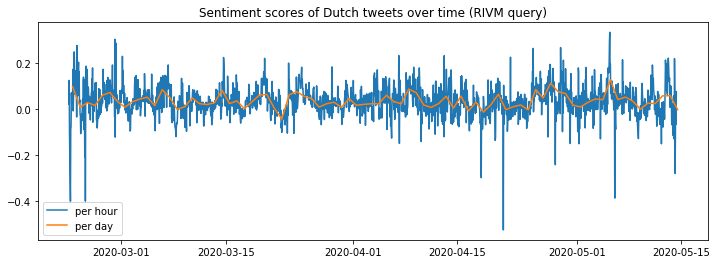

In [97]:
sentimentPerHour = getSentimentPerHour(DATADIRECTORYRIVM)
sentimentPerDay = makeSentimentPerDay(sentimentPerHour)
visualizeSentiment([{DATA:sentimentPerHour,LABEL:"per hour"},{DATA:sentimentPerDay,LABEL:"per day"}],title=DEFAULTTITLE+" (RIVM query)")

## Sort days by sentiment score

In [94]:
{k:v for k,v in sorted(sentimentPerDay.items(),key=lambda item:item[1][SENTIMENT])}

{'20200322-12': {'sentiment': -0.04297012630880684, 'count': 8637},
 '20200418-12': {'sentiment': -0.01314631195945318, 'count': 3964},
 '20200416-12': {'sentiment': -0.0077987618522368015, 'count': 5685},
 '20200424-12': {'sentiment': -0.0035841825018657386, 'count': 2731},
 '20200421-12': {'sentiment': -0.002453768637961215, 'count': 5276},
 '20200514-12': {'sentiment': -0.0020622697204521136, 'count': 223},
 '20200308-12': {'sentiment': -0.0007267400880460683, 'count': 3768},
 '20200509-12': {'sentiment': -0.000319871026704408, 'count': 2841},
 '20200317-12': {'sentiment': 0.0018961155003085271, 'count': 10474},
 '20200321-12': {'sentiment': 0.004071142643697075, 'count': 7353},
 '20200414-12': {'sentiment': 0.004631946169418988, 'count': 2944},
 '20200411-12': {'sentiment': 0.007448706110406927, 'count': 2638},
 '20200330-12': {'sentiment': 0.007678586780335376, 'count': 6736},
 '20200301-12': {'sentiment': 0.008460195459694607, 'count': 4472},
 '20200327-12': {'sentiment': 0.00910

## Examine tweet texts from day with extreme sentiment

In [124]:
import gzip
import json
import numpy as np
from library import getTweetText

def removeNewlines(text):
    return(re.sub(r"\n",r" ",text))

HOURSPERDAY = 24
DATE = "20200322"
TWEETDIRECTORYRIVM = "../data/rivm/"

tweetTexts = []
for hour in range(0,HOURSPERDAY):
    hour = str(hour).zfill(2)
    inFile = gzip.open(TWEETDIRECTORYRIVM+DATE+"-"+hour+".rivm.gz")
    for line in inFile:
        jsonData = json.loads(line)
        tweetText = removeNewlines(getTweetText(jsonData))
        tweetTexts.append(tweetText)
    inFile.close()
    
pd.DataFrame(tweetTexts)[0].value_counts()[0:20]

Laat het even doordringen: België een land waarmee Nederland intensief samenwerkt in Benelux verband - een samenwerking waar @minpres veelvuldig naar verwijst - zet nu containers bij grensovergang om ons te weren. Hoe kan dit in hemelsnaam? #Coronavirusnl #coronanederland https://t.co/m32CjxHWnh                                  523
#corona RIVM baas noemt ‘herd immunity’ nu een ‘bijeffect’. Was eerst het ei van Columbus. Geeft nu toe dat alleen een vaccin helpt. Wat heeft deze man allemaal op z’n geweten .... en wat is Rutte een onbenul geweest om deze man blindelings te volgen. https://t.co/hEgGqZrhRl                                                       174
Na een paar maanden #coronavirus weten we een paar dingen.  - Het RIVM en het kabinet reageren te laat. - Aan de EU hebben we niets. - Mensen met het verstand van een aardbei gaan massaal opstap.  #covid19Nederland https://t.co/ESx2iKNq1y                                                                                            15